# Multi inputs DIC

This notebook shows how to use multi correlation of the same increment using different image.

## Experimental protocol
The idea behind this is to access a better measurement and an error estimation for displacement field and strain field.

To do so during the experiement, 4 differents pictures are taken at each time step. Therefore for the correlation between $t_1$ and $t_2$ we can performed 16 correlations of different images inputs.

Then we will do some statistic to better eveluat the strain field and the associated error.

## Load the data


In [1]:
import xarray_dic.loadDIC as xldd
import xarray_dic.xarray_dic as xd
import xarray_symTensor2d.xarray_symTensor2d as xsT

import os
import natsort
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
adr='/data/FlorianFiguiere/GI06/DIC/DIC/Loading/Speakle_01/nm_analysis/gdr/'

In [3]:
res=0.015
unit_spa='millimeter'
time_step=0.005
unit_time='macro strain'

In [4]:
ds=xldd.multi_load(xldd.load7D,adr,res,time_step,unit_time=unit_time,unit_res=unit_spa)

In [5]:
ds

<xarray.Dataset>
Dimensions:       (d: 2, ncor: 16, sT: 6, time: 3, x: 168, y: 398)
Coordinates:
  * x             (x) float64 0.0 0.27 0.54 0.81 ... 44.28 44.55 44.82 45.09
  * y             (y) float64 0.0 0.27 0.54 0.81 ... 106.4 106.7 106.9 107.2
  * time          (time) float64 0.005 0.01 0.015
Dimensions without coordinates: d, ncor, sT
Data variables:
    displacement  (ncor, time, y, x, d) float64 -4.229 0.1801 ... 0.06294 0.5392
    strain        (ncor, time, y, x, sT) float64 0.002688 -0.1184 ... nan nan
Attributes:
    unit_time:      macro strain
    step_size:      0.015
    unit_position:  millimeter
    window_size:    18
    path_dat:       /data/FlorianFiguiere/GI06/DIC/DIC/Loading/Speakle_01/nm_...
    DIC_software:   7D

## Compute the average and standard deviation

In [6]:
ads=ds.dic.dic_average()

/home/chauvet/miniconda3/envs/basepy39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [7]:
ads

<xarray.Dataset>
Dimensions:           (d: 2, sT: 6, time: 3, x: 168, y: 398)
Coordinates:
  * x                 (x) float64 0.0 0.27 0.54 0.81 ... 44.28 44.55 44.82 45.09
  * y                 (y) float64 0.0 0.27 0.54 0.81 ... 106.4 106.7 106.9 107.2
  * time              (time) float64 0.005 0.01 0.015
Dimensions without coordinates: d, sT
Data variables:
    displacement      (time, y, x, d) float64 -4.206 0.207 ... 0.06631 0.5475
    strain            (time, y, x, sT) float64 0.001017 -0.006453 ... nan nan
    std_displacement  (time, y, x, d) float64 0.01627 0.0259 ... 0.01252
    std_strain        (time, y, x, sT) float64 0.002637 0.0338 nan ... nan nan
Attributes:
    unit_time:      macro strain
    step_size:      0.015
    unit_position:  millimeter
    window_size:    18
    path_dat:       /data/FlorianFiguiere/GI06/DIC/DIC/Loading/Speakle_01/nm_...
    DIC_software:   7D

In [8]:
ads['eqVM_LN']=ads.strain.sT.eqVonMises(lognorm=True)
ads['eqVM']=ads.strain.sT.eqVonMises(lognorm=False)
ads['std_eqVM_LN']=ads.std_strain.sT.eqVonMises(lognorm=True)
ads['std_eqVM']=ads.std_strain.sT.eqVonMises(lognorm=False)
ds['eqVM_LN']=ds.strain.sT.eqVonMises(lognorm=True)
ds['eqVM']=ds.strain.sT.eqVonMises(lognorm=False)

/home/chauvet/Documents/GitGricad/lib-python/xarray_symTensor2d/xarray_symTensor2d/xarray_symTensor2d.py:38: RuntimeWarning: divide by zero encountered in log
  deq[j,i,...]=np.log(deq[j,i,...]/med[j,i])


In [9]:
ads

<xarray.Dataset>
Dimensions:           (d: 2, sT: 6, time: 3, x: 168, y: 398)
Coordinates:
  * time              (time) float64 0.005 0.01 0.015
  * x                 (x) float64 0.0 0.27 0.54 0.81 ... 44.28 44.55 44.82 45.09
  * y                 (y) float64 0.0 0.27 0.54 0.81 ... 106.4 106.7 106.9 107.2
Dimensions without coordinates: d, sT
Data variables:
    displacement      (time, y, x, d) float64 -4.206 0.207 ... 0.06631 0.5475
    strain            (time, y, x, sT) float64 0.001017 -0.006453 ... nan nan
    std_displacement  (time, y, x, d) float64 0.01627 0.0259 ... 0.01252
    std_strain        (time, y, x, sT) float64 0.002637 0.0338 nan ... nan nan
    eqVM_LN           (time, y, x) float64 0.8477 0.7241 ... 0.1806 0.6792
    eqVM              (time, y, x) float64 0.00794 0.007018 ... 0.005896
    std_eqVM_LN       (time, y, x) float64 1.437 1.212 0.4679 ... 0.163 0.6228
    std_eqVM          (time, y, x) float64 0.02651 0.02116 ... 0.002859 0.004528
Attributes:
    unit_time:      macro strain
    step_size:      0.015
    unit_position:  millimeter
    window_size:    18
    path_dat:       /data/FlorianFiguiere/GI06/DIC/DIC/Loading/Speakle_01/nm_...
    DIC_software:   7D

## Plot the mean strain field

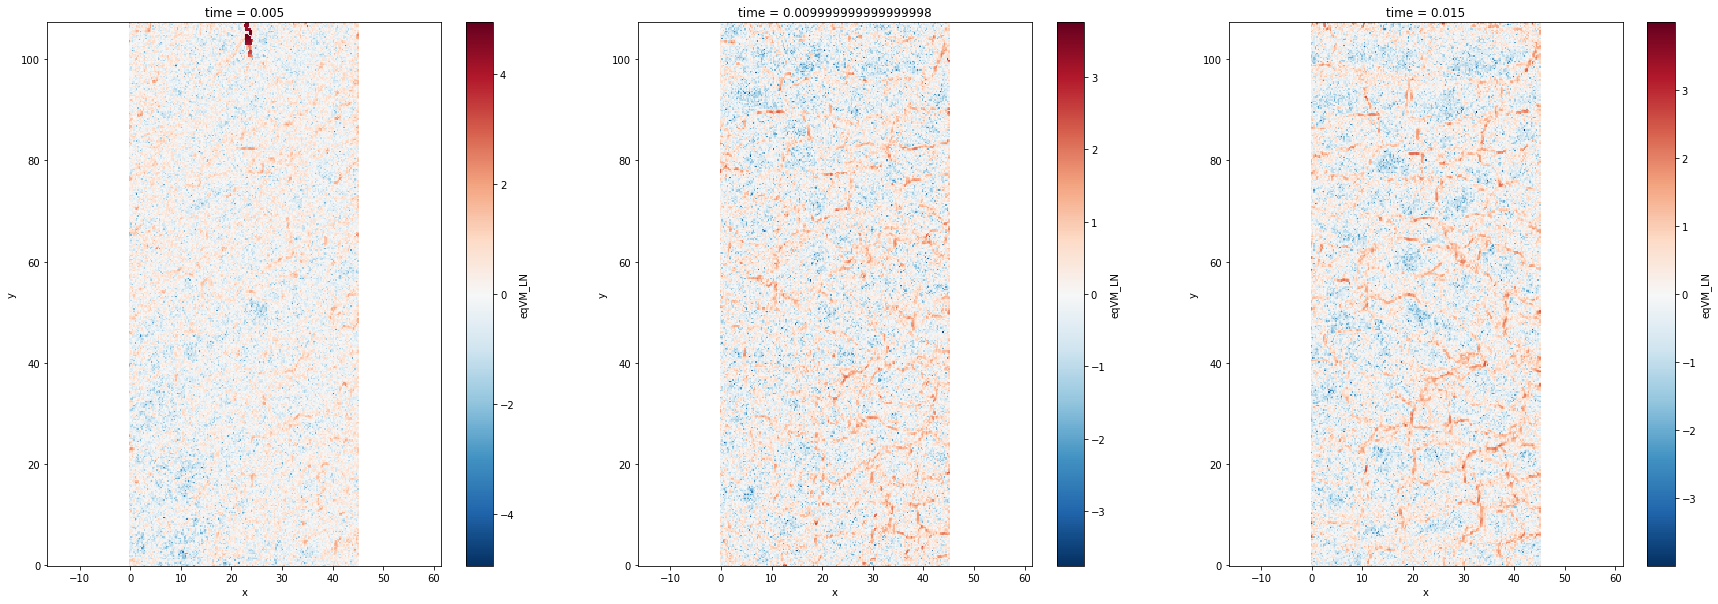

In [10]:
plt.figure(figsize=(30,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    ads.eqVM_LN[i,:,:].plot()
    plt.axis('equal')

## Plot the associated error (STD)

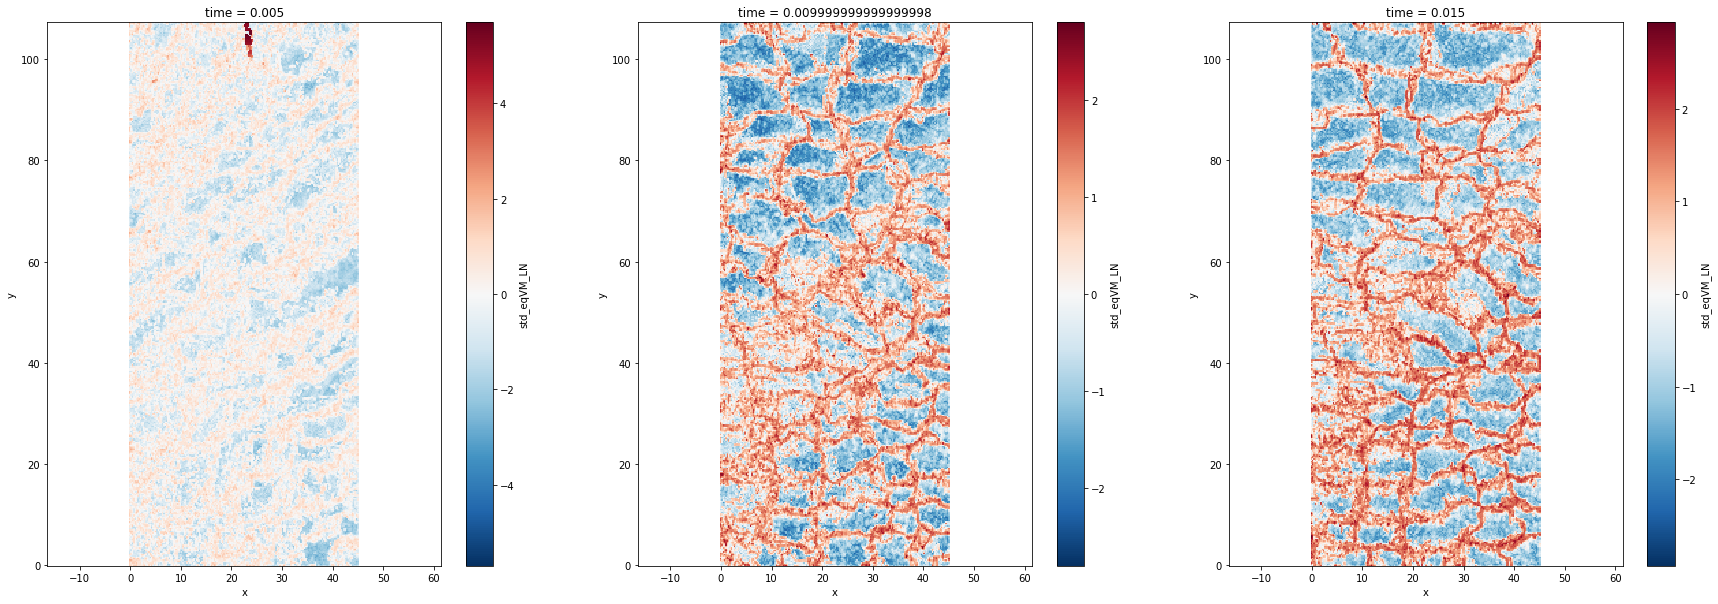

In [11]:
plt.figure(figsize=(30,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    ads.std_eqVM_LN[i,:,:].plot()
    plt.axis('equal')

```{warning}
 Here the  signal we see on the strain field map is similar to the one on the error map. Therefore we can**not** use this for our statistic. The correlation windows used during the DIC is most likely too small 
```